<a href="https://colab.research.google.com/github/ibrahimmhammed/projects/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score



**Reading files**

In [ ]:
train = pd.read_csv("//content//train.csv")
test = pd.read_csv("//content//test.csv")

**Exploration and describtion**

In [ ]:
train.shape
test.shape

train.describe()
test.describe()

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Cleaning**

In [ ]:
if_null = train.isnull().sum()
if_null[if_null>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [ ]:
def clean(d):
    d.drop(["Name", "Ticket", "Fare", "Cabin", "Embarked"], axis=1, inplace=True)  # deleting unnecessary columns

    d['Age'] = d['Age'].fillna(d['Age'].median())  # fill nulls in the Age column
    d.dropna(inplace=True)  # drop rows with any remaining missing values

    d.reset_index(drop=True, inplace=True)  # reset the index after dropping rows
    return d



In [ ]:
clean(train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


In [ ]:
clean(test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


**Analysis**

<ipython-input-747-17fcb9fc05d8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = train.corr() #correlation measuring


<Axes: >

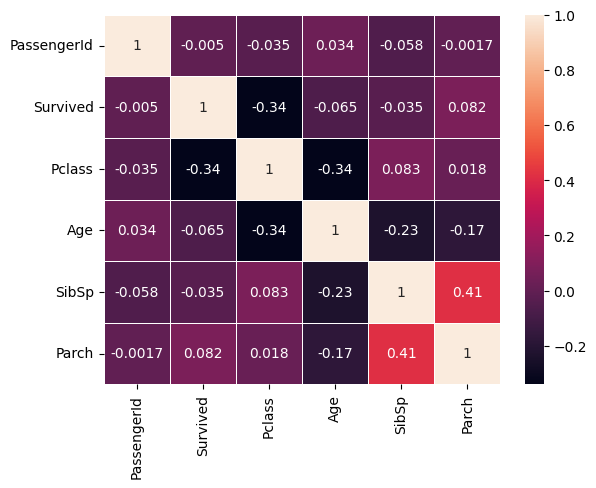

In [ ]:
cor = train.corr() #correlation measuring
sns.heatmap(cor,annot=True,linewidths=.5)


In [ ]:
train.Survived.value_counts() #number of died and survived
train.Sex.value_counts() #number of men and women

male      577
female    314
Name: Sex, dtype: int64

<Axes: ylabel='Survived'>

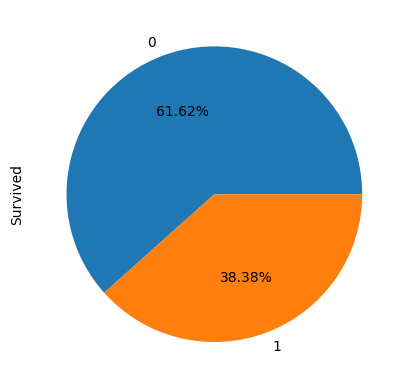

In [ ]:
#visulaize these numbers
train.Survived.value_counts().plot.pie(autopct="%0.2f%%")



<Axes: ylabel='Sex'>

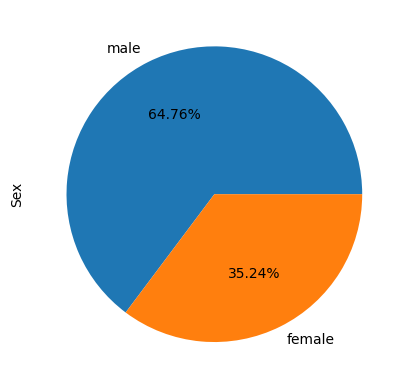

In [ ]:
train.Sex.value_counts().plot.pie(autopct="%0.2f%%")

<Axes: xlabel='Sex', ylabel='count'>

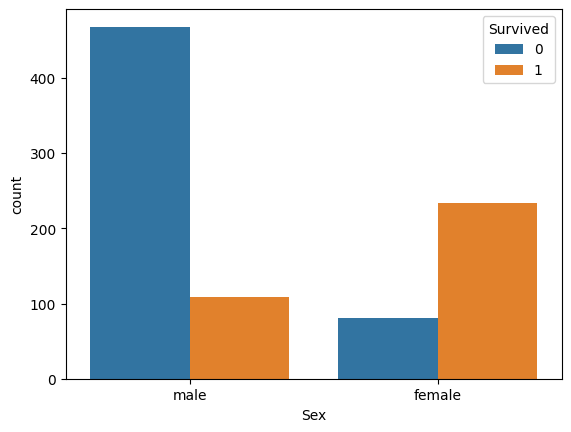

In [ ]:
sns.countplot(data=train, x='Sex', hue='Survived') #men and women segmentation depending on survived or not

<Axes: xlabel='Pclass', ylabel='count'>

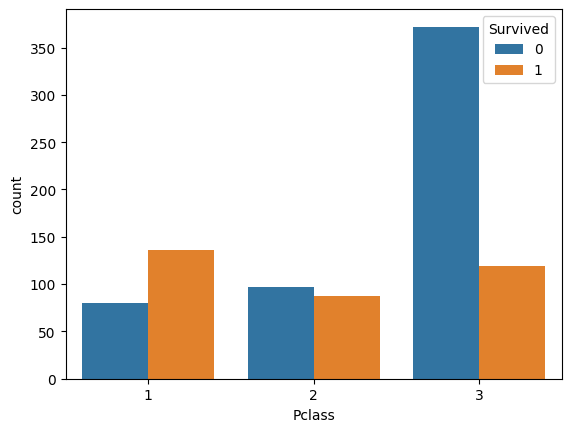

In [ ]:
sns.countplot(data=train, x='Pclass', hue='Survived') # survived or not segmentation depending on pclass

**converting datatype**

In [ ]:
# Replace the 'male' and 'female' values with 1 and 0, respectively
train['Sex'] = train['Sex'].replace('male', 1)
train['Sex'] = train['Sex'].replace('female', 0)

test['Sex'] = test['Sex'].replace('male', 1)
test['Sex'] = test['Sex'].replace('female', 0)

train
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,1,34.5,0,0
1,893,3,0,47.0,1,0
2,894,2,1,62.0,0,0
3,895,3,1,27.0,0,0
4,896,3,0,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0
414,1306,1,0,39.0,0,0
415,1307,3,1,38.5,0,0
416,1308,3,1,27.0,0,0


**training model**

In [ ]:
x = train.drop(["Survived"],axis=1) #difining x
y = train.Survived #difining y




In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=.7,shuffle=True,random_state=44) #spliting data

In [ ]:
accuracies= []

In [ ]:
def testing(model):
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  accuracy = accuracy_score(pred,y_test)
  print ("accuracy score is \n", accuracy)
  accuracies.append(accuracy) #to see all accuracies together


**Applying Algorithms**

In [ ]:
model1 = KNeighborsClassifier()
testing(model1)

accuracy score is 
 0.5335820895522388


In [ ]:
model2= DecisionTreeClassifier()
testing(model2)

accuracy score is 
 0.7276119402985075


In [ ]:
model3 = GaussianNB()
testing(model3)

accuracy score is 
 0.7201492537313433


In [ ]:
model4= SVC()
testing(model4)

accuracy score is 
 0.6119402985074627


In [ ]:
model5= RandomForestClassifier()
testing(model5)

accuracy score is 
 0.7985074626865671


In [ ]:
model6 = GradientBoostingClassifier()
testing(model6)

accuracy score is 
 0.8022388059701493


In [ ]:
#gathering all accuracies

algorithms = ["KNeighborsClassifier","DecisionTreeClassifier","GaussianNB","SVC","RandomForestClassifier","GradientBoostingClassifier"]
gathering = pd.DataFrame({"algorithms" :algorithms, "accuracies":accuracies})
print(gathering)

                   algorithms  accuracies
0        KNeighborsClassifier    0.533582
1      DecisionTreeClassifier    0.727612
2                  GaussianNB    0.720149
3                         SVC    0.611940
4      RandomForestClassifier    0.798507
5  GradientBoostingClassifier    0.802239


In [ ]:
#using algorithm with new data (test data)

Gradient_Boosting = GradientBoostingClassifier()
Gradient_Boosting.fit(x_train,y_train)


GradientBoostingClassifier()

In [ ]:
predicting= Gradient_Boosting.predict(test)


NameError: ignored

In [ ]:
#final results
ID = test.PassengerId
new_df = pd.DataFrame({"id":ID,"pre":predicting})
new_df



,id,pre
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
